Компания, занимающаяся оптовыми поставками зернового кофе, запросила отчёт о продажах по месяцам. Интересуют только те продажи, у которых не было доставки: их количество в месяц, процент плохих отзывов, доходность таких транзакций – в разрезе на продажи с вводом клиентом  промокода и без. 
Имеется выгрузка всех продаж с момента основания компании.
Необходимо написать код на Python, который прочтет выгрузку, проведет необходимые расчеты и запишет таблицу-результат в эксель. 

Поля итоговой таблицы: 


«Месяц» – «Введен промокод» – «Кол-во транзакций» – «Плохих отзывов, %» - «Доходность, %».



## Загрузка нужных библиотек

In [1]:
# !pip install pandas 
# !pip install openpyxl 
# !pip install datetime 
# !pip install chardet
# !pip install collections 
# !pip install matplotlib

In [2]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime
import chardet
from collections import Counter
import matplotlib.pyplot as plt


## Загрузка данных

In [3]:

# определение кодировки файла
with open('Транзакции.csv', 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']

# чтение файла с использованием определенной кодировки
data = pd.read_csv('Транзакции.csv', encoding=encoding,sep='\t')


## Предобработка 

In [4]:
data.columns = [i.lower().strip() for i in data.columns]

In [5]:
data.rename(columns={'доставка':'delivery','плохой отзыв':'bad_feedback'},inplace=True)

In [6]:
data=data[data['delivery']==0]

In [7]:

def to_dt(row):
    # Преобразование строки времени в объект datetime
    row = datetime.strptime(row, '%Y-%b-%d %H:%M:%S')

    # Форматирование времени в требуемый формат
    return row.strftime('%d-%m-%Y')

In [8]:
data.loc[:,('date')] = data['date'].apply(to_dt)

In [9]:
data.set_index('date',inplace=True)

In [10]:
data.index = pd.to_datetime(data.index)

In [11]:
data['month'] = data.index.month

In [12]:
data.head(2)

,transactionid,count,cost,delivery,bad_feedback,paid,weight,promo,autoissue,month
date,,,,,,,,,,
2020-08-21,1,67,6325,0,0,"2605,0",5481,0,0,8
2019-10-15,3,59,9819,0,1,"9995,0",5170,1,0,10


In [13]:
def coma_to_dot_float(row):
    return float(row.replace(',','.'))

In [14]:
data['paid'] = data['paid'].apply(coma_to_dot_float)

In [15]:
data['paid']

date
2020-08-21     2605.0
2019-10-15     9995.0
2020-08-23     6251.0
2020-08-31     2047.0
2020-08-29     6300.0
               ...   
2019-02-12     8613.0
2020-08-26    10181.0
2020-08-27     3873.0
2020-08-30     5156.0
2020-08-27     7200.0
Name: paid, Length: 7128, dtype: float64

In [16]:
# функция для подсчетов типов
def counter_of_type(data):
    return Counter(data.dtypes)
    

In [17]:
# Собственная функция для ознакомления с данными
def preview(data,n_row=4,
             head=True,
             info=True,
             columns=True,
             shape=True,
             isna=True,
             duplicated=True,
             dtypes_=True,
            describe_=True,
           clear_duples=True,
           lower_and_sep_col=True):
    global dct_nan
    global df_nan_columns
    dct_nan = {}
    if head:
        print(f'First {n_row} row(s) in the head of data')
        display(data.head(n_row))
        print('-'*30)
    if info:
        print('Data Information:')
        display(data.info())
        print('-'*30)
    if columns:
        print('Data columns:')
        display(data.columns)
        if lower_and_sep_col:
            COLUMN_REG = "(\w)([A-Z])" 
            repl = r"\1_\2"
            data.columns = list(map(lambda x: re.sub(COLUMN_REG,repl,x).lower(),data.columns))
            print('Lowered and sepperated by words columns:')
            print(data.columns)
            print('-'*30)
    if shape:
        print('Data shape:')
        display(data.shape)
        print('-'*30)
    if isna:
        print('Data isna by row mean:')
        display(data.isna().mean())
        print()
        tmp = data.isna().mean()
        for i in range(len(tmp)):
            if tmp[i] > 0:
                dct_nan[tmp.index[i]] = tmp[i]
        if tmp.sum() > 0:
            df_nan_columns = pd.DataFrame.from_dict(dct_nan.items())
            df_nan_columns.columns = ['column','rate_of_nan']
            display(df_nan_columns)
        print('-'*30)
    if duplicated:
        print('Data clear duplicates sum:')
        duplets = data.duplicated().sum()
        display(duplets)
        if duplets >1 and clear_duples:
            data.drop_duplicates(inplace=True)
            print('Successful delete of {0} duplicates'.format(duplets))
        elif duplets == 1 and clear_duples:
            data.drop_duplicates(inplace=True)
            print('Successful delete of {0} duplicate'.format(duplets))
        print('-'*30)
    if dtypes_:
        print('Data dtypes:')
        display(data.dtypes)
        print('Number of each type:')
        print(counter_of_type(data))
        print('-'*30)
    if describe_:
        print('Major statistics for data:')
        display(data.describe())
        

In [18]:
preview(data,clear_duples=False,lower_and_sep_col=False)

First 4 row(s) in the head of data


,transactionid,count,cost,delivery,bad_feedback,paid,weight,promo,autoissue,month
date,,,,,,,,,,
2020-08-21,1,67,6325,0,0,2605.0,5481,0,0,8
2019-10-15,3,59,9819,0,1,9995.0,5170,1,0,10
2020-08-23,8,45,6381,0,0,6251.0,9227,0,0,8
2020-08-31,9,31,8795,0,1,2047.0,6044,0,1,8


------------------------------
Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7128 entries, 2020-08-21 to 2020-08-27
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionid  7128 non-null   int64  
 1   count          7128 non-null   int64  
 2   cost           7128 non-null   int64  
 3   delivery       7128 non-null   int64  
 4   bad_feedback   7128 non-null   int64  
 5   paid           7128 non-null   float64
 6   weight         7128 non-null   int64  
 7   promo          7128 non-null   int64  
 8   autoissue      7128 non-null   int64  
 9   month          7128 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 612.6 KB


None

------------------------------
Data columns:


Index(['transactionid', 'count', 'cost', 'delivery', 'bad_feedback', 'paid',
       'weight', 'promo', 'autoissue', 'month'],
      dtype='object')

Data shape:


(7128, 10)

------------------------------
Data isna by row mean:


transactionid    0.0
count            0.0
cost             0.0
delivery         0.0
bad_feedback     0.0
paid             0.0
weight           0.0
promo            0.0
autoissue        0.0
month            0.0
dtype: float64


------------------------------
Data clear duplicates sum:


0

------------------------------
Data dtypes:


transactionid      int64
count              int64
cost               int64
delivery           int64
bad_feedback       int64
paid             float64
weight             int64
promo              int64
autoissue          int64
month              int64
dtype: object

Number of each type:
Counter({dtype('int64'): 9, dtype('float64'): 1})
------------------------------
Major statistics for data:


,transactionid,count,cost,delivery,bad_feedback,paid,weight,promo,autoissue,month
count,7128.000000,7128.000000,7128.000000,7128.0,7128.000000,7128.000000,7128.000000,7128.000000,7128.000000,7128.000000
mean,7173.531566,50.454125,6982.046156,0.0,0.499719,7514.345727,7028.022306,0.496493,0.490600,6.448232
std,4132.983733,28.568403,1717.573313,0.0,0.500035,4342.495972,1722.224032,0.500023,0.499947,3.214708
min,1.000000,1.000000,4000.000000,0.0,0.000000,0.000000,4000.000000,0.000000,0.000000,1.000000
25%,3625.750000,26.000000,5504.750000,0.0,0.000000,3696.000000,5558.750000,0.000000,0.000000,4.000000
50%,7164.000000,50.000000,6977.500000,0.0,0.000000,7507.000000,7053.500000,0.000000,0.000000,6.000000
75%,10718.250000,75.000000,8462.000000,0.0,1.000000,11286.250000,8511.000000,1.000000,1.000000,9.000000
max,14364.000000,100.000000,9998.000000,0.0,1.000000,15000.000000,9999.000000,1.000000,1.000000,12.000000


## Финальная таблица

In [19]:
# создаем нужную таблицу
final_data = (data.groupby(['month', 'promo']).agg(
    transaction_count=('transactionid', 'count'),
    bad_feedback_rate=('bad_feedback', lambda x: x.mean()*100),
    sum_of_cost =('cost','sum'),
    sum_of_paid =('paid','sum')
).assign(profitability=lambda x: (x['sum_of_paid']-x['sum_of_cost'])/x['sum_of_cost']*100)
.drop(columns=['sum_of_cost','sum_of_paid']))


In [20]:
for i in final_data.select_dtypes('float').columns:
    final_data[i] = final_data[i].apply(lambda x: round(x,1) if isinstance(x,float) else x)

## Графики

In [21]:
# отфильтруем данные по значениям promo и построим графики
data_promo_0 = final_data[final_data.index.get_level_values('promo') == 0]
data_promo_1 = final_data[final_data.index.get_level_values('promo') == 1]


In [22]:
def linear_graph(data_0,
          data_1,
          x,
          y,
          label_1,
          label_2,
          color_1,
          color_2,
          title,
          xlabel,
          ylabel,
          alpha_1=1,
          alpha_2=1):
    print('Линейные графики')
    fig, ax = plt.subplots(figsize=(10, 5))
    # график для promo 0
    ax.plot(data_0.index.get_level_values(x), 
            data_0[y], 
            label=label_1,
           alpha=alpha_1,
           color=color_1)

    # график для promo 1
    ax.plot(data_1.index.get_level_values(x), 
            data_1[y], 
            label=label_2,
           alpha=alpha_2,
           color=color_2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    plt.grid(color='LightBlue', alpha=0.7, linestyle=':', linewidth=2)

    plt.show()


In [23]:
def bar_graph(data_0,
          data_1,
          x,
          y,
          label_1,
          label_2,
          color_1,
          color_2,
          title,
          xlabel,
          ylabel,
          alpha_1=0.6,
          alpha_2=0.4):
    print('Столбчатые диаграммы')
    fig, ax = plt.subplots(figsize=(10, 5))

    # график для promo 0
    ax.bar(data_0.index.get_level_values(x), 
            data_0[y], 
            label=label_1,
           alpha=alpha_1,
           color=color_1)

    # график для promo 1
    ax.bar(data_1.index.get_level_values(x), 
            data_1[y], 
            label=label_2,
           alpha=alpha_2,
           color=color_2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    plt.grid(color='LightBlue', alpha=0.7, linestyle=':', linewidth=2)

    plt.show()

Линейные графики


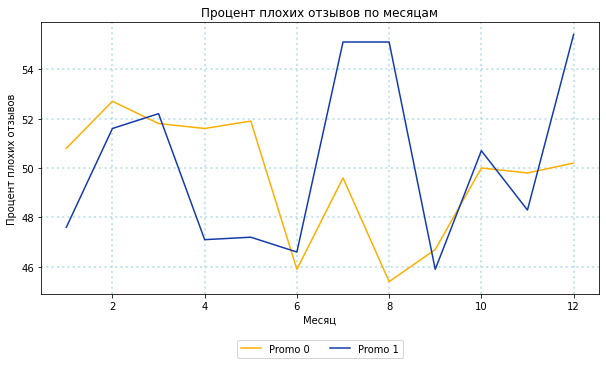

In [24]:
linear_graph(data_0=data_promo_0,
data_1=data_promo_1,    
x='month',
y='bad_feedback_rate',
label_1='Promo 0',
label_2='Promo 1',
color_1='#FFAE00',
color_2='#133AAC',  
title='Процент плохих отзывов по месяцам',
xlabel='Месяц',
ylabel='Процент плохих отзывов')


Столбчатые диаграммы


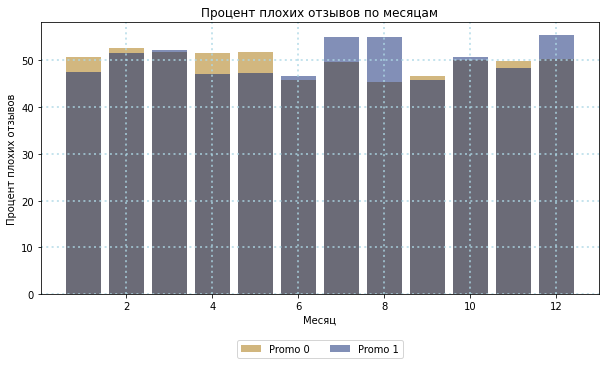

In [25]:
bar_graph(data_0=data_promo_0,
data_1=data_promo_1,    
x='month',
y='bad_feedback_rate',
label_1='Promo 0',
label_2='Promo 1',
alpha_1=0.5,
alpha_2=0.5,
color_1='#A67100',
color_2='#062170',  
title='Процент плохих отзывов по месяцам',
xlabel='Месяц',
ylabel='Процент плохих отзывов')


Линейные графики


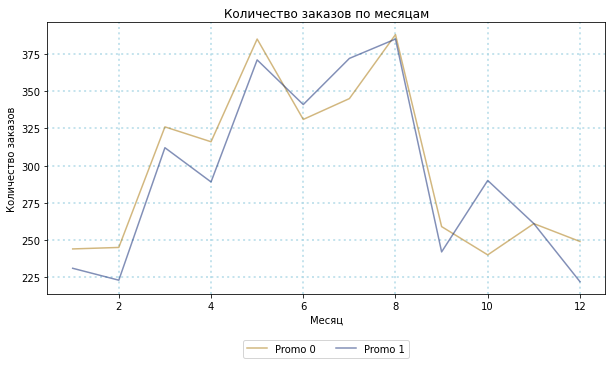

In [26]:
linear_graph(data_0=data_promo_0,
data_1=data_promo_1,    
x='month',
y='transaction_count',
label_1='Promo 0',
label_2='Promo 1',
alpha_1=0.5,
alpha_2=0.5,
color_1='#A67100',
color_2='#062170',  
title='Количество заказов по месяцам',
xlabel='Месяц',
ylabel='Количество заказов')


Столбчатые диаграммы


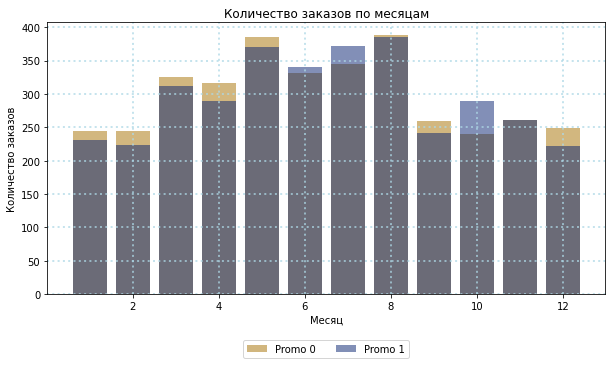

In [27]:
bar_graph(data_0=data_promo_0,
data_1=data_promo_1,    
x='month',
y='transaction_count',
label_1='Promo 0',
label_2='Promo 1',
alpha_1=0.5,
alpha_2=0.5,
color_1='#A67100',
color_2='#062170',  
title='Количество заказов по месяцам',
xlabel='Месяц',
ylabel='Количество заказов')


Линейные графики


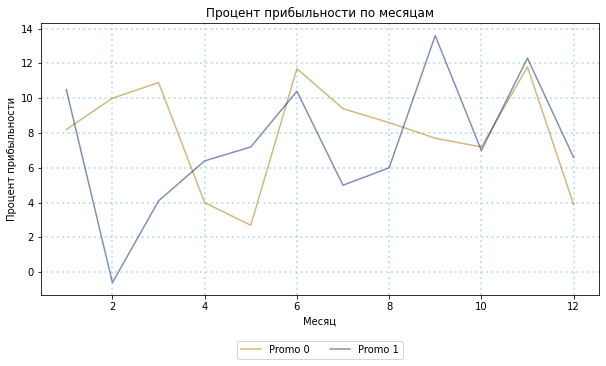

In [28]:
linear_graph(data_0=data_promo_0,
data_1=data_promo_1,    
x='month',
y='profitability',
label_1='Promo 0',
label_2='Promo 1',
alpha_1=0.5,
alpha_2=0.5,
color_1='#A67100',
color_2='#062170',  
title='Процент прибыльности по месяцам',
xlabel='Месяц',
ylabel='Процент прибыльности')


In [29]:
final_data

transaction_count  bad_feedback_rate  profitability
month promo                                                     
1     0                    244               50.8            8.2
      1                    231               47.6           10.5
2     0                    245               52.7           10.0
      1                    223               51.6           -0.6
3     0                    326               51.8           10.9
      1                    312               52.2            4.1
4     0                    316               51.6            4.0
      1                    289               47.1            6.4
5     0                    385               51.9            2.7
      1                    371               47.2            7.2
6     0                    331               45.9           11.7
      1                    341               46.6           10.4
7     0                    345               49.6            9.4
      1                    372               55.1            5.0
8     0                    388               45.4            8.6
      1                    385               55.1            6.0
9     0                    259               46.7            7.7
      1                    242               45.9           13.6
10    0                    240               50.0            7.2
      1                    290               50.7            7.0
11    0                    261               49.8           11.8
      1                    261               48.3           12.3
12    0                    249               50.2            3.9
      1                    222               55.4            6.6

Столбчатые диаграммы


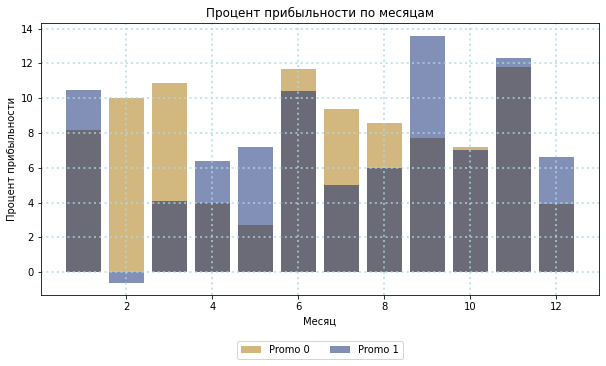

In [30]:
bar_graph(data_0=data_promo_0,
data_1=data_promo_1,    
x='month',
y='profitability',
label_1='Promo 0',
label_2='Promo 1',
alpha_1=0.5,
alpha_2=0.5,
color_1='#A67100',
color_2='#062170',  
title='Процент прибыльности по месяцам',
xlabel='Месяц',
ylabel='Процент прибыльности')


In [31]:
# создание новой эксель-таблицы и запись в нее данных
wb = Workbook()
ws = wb.active
for r in dataframe_to_rows(final_data, index=True, header=True):
    ws.append(r)
wb.save('final_shop.xlsx')